# DATA SCIENCE

### 1. IMPORT LIBRARIES

In [17]:
import pandas as pd
import statistics as stat
import numpy as np
from scipy.stats import skew
import plotly.graph_objects as go
from scipy.stats import norm

### 2. LOAD DATASET

In [3]:
df=pd.read_csv("dataset.csv")
data=df['age'].tolist()

### 3. COMPUTING STATISTICS

In [23]:
# Mean
mean=stat.mean(data)

# Median
median=stat.median(data)

#variance
variance=stat.variance(data)

# Standard deviation
std_dev=stat.stdev(data)

#mode
mode=stat.mode(data)

# skewness
skewness=skew(data)

# data range = max-minimal value  AGE
data_range=np.ptp(data)

# Quartiles
q1=np.percentile(data, 25)
q3=np.percentile(data,75)
q2=np.percentile(data,50)

# Quartiles Deviation
quartile_deviation=(q3-q1)/2

# Mean deviation
mean_deviation=np.mean(np.abs(np.array(data)-mean))


### 4. PRINT OUTPUT

In [20]:
print("Avarage Mean",mean)

Avarage Mean 42.2475


In [21]:
print("Median",median)

Median 42.0


In [24]:
print("Mode",mode)

Mode 56


In [25]:
print("Variance",variance)

Variance 442.7676275637819


In [26]:
print("Standard dev",std_dev)

Standard dev 21.042044281955636


In [27]:
print("Skewness",skewness)

Skewness 16.171882951561983


In [28]:
print("Range",data_range)

Range 682


In [29]:
print("1st Q",q1)
print("2st Q",q2)
print("3st Q",q3)
print("Q dev",quartile_deviation)


1st Q 30.0
2st Q 42.0
3st Q 54.0
Q dev 12.0


In [30]:
print("Mean deviation",mean_deviation)

Mean deviation 12.5436675


### 5. NORMAL DISTRIBUTION

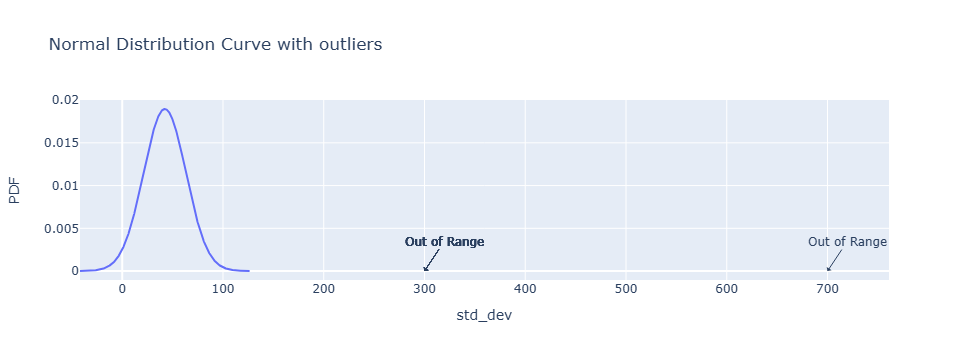

In [42]:
# calculate z_score:  is a standard deviation of individual age (x)
z_score=(np.array(data)-mean)/std_dev

# plot normal curve with outliers marked on x-axis

x=np.linspace(mean-4*std_dev,mean+4*std_dev,1000)
y=norm.pdf(x,mean,std_dev)

#identify outliers
outliers=[age for age in data if age <mean -3*std_dev or age > mean+3*std_dev]

outlier_labels={
mean-3*std_dev: "-3Q",
mean-2*std_dev: "-2Q",
mean-std_dev: "-Q",

mean+std_dev: "+Q",
mean+2*std_dev: "+2Q",
mean+3*std_dev: "+3Q"

}

fig=go.Figure()
fig.add_trace(go.Scatter(x=x,y=y, mode='lines',name='Normal Distribution'))
for outlier in outliers:
    if outlier <mean-3*std_dev :
        x_position=mean-3*std_dev
    elif outlier > mean+3*std_dev:
        x_position=mean+3*std_dev
    else:
        continue
    fig.add_annotation(x=outlier,y=0,text="Out of Range",  showarrow=True,  arrowhead=1, ax=20)

#adding outlier label to x axis
for x_val, label in outlier_labels.items():
     fig.add_annotation(x=outlier,y=0,text="Out of Range",  showarrow=True,  arrowhead=1, ax=20)
fig.update_layout(title="Normal Distribution Curve with outliers",xaxis_title="std_dev",yaxis_title="PDF")
fig.show()
    


 

### 6 AGE INTERVAL BAR GRAPH

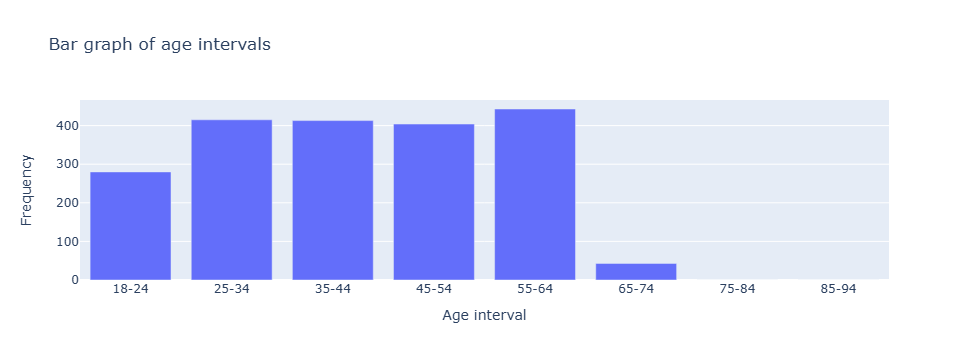

In [47]:
#age interval
bins=[18,25,35,45,55,65,75,85,95]
#calculate the frequency of each bin
hist,bi_edges=np.histogram(data,bins=bins)
#bar graph with age intervals
bin_labels=[f"{bi_edges[i]}-{bi_edges[i+1]-1}"for i in range(len(bi_edges)-1)]
fig=go.Figure(data=[go.Bar(x=bin_labels,y=hist)])
fig.update_layout(title="Bar graph of age intervals", xaxis_title="Age interval",yaxis_title="Frequency")
fig.show()


### 7. QUARTILES BOX PLOT

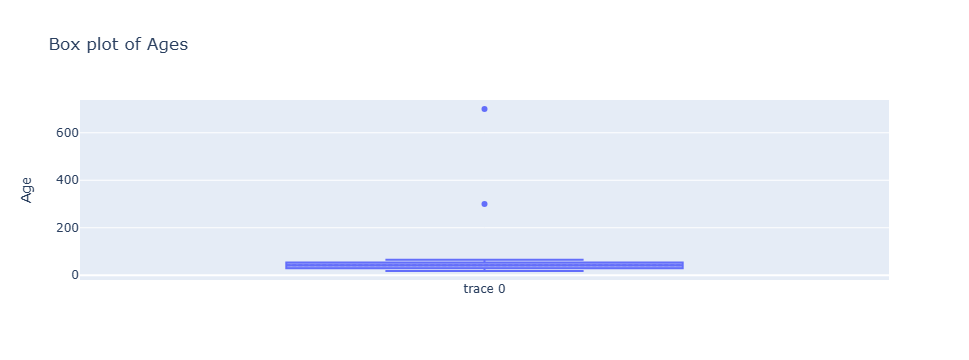

In [48]:
# Box plot
fig=go.Figure(data=[go.Box(y=data,boxmean=True)])
fig.update_layout(title="Box plot of Ages", yaxis_title="Age")
fig.show()

### 8. FREQUENCY DISTRIBUTION

In [54]:
frequency_dict={}
for value in data:
    frequency_dict[value]=frequency_dict.get(value,0)+1
#sort frequency distribution by keys
frequency_sorted=dict(sorted(frequency_dict.items()))

#compute cumulative and relative freq
cumulative_frequency=0
total_values=len(data)
frequency_table=[]

for value, freq in frequency_sorted.items():
    cumulative_frequency+=freq
    relative_frequency=freq/total_values
    percentage_frequency=relative_frequency*100
    cumulative_relative_frequency=cumulative_frequency/total_values
    frequency_table.append([value, freq, relative_frequency, percentage_frequency, cumulative_frequency, cumulative_relative_frequency])

#creating Dataframe
columns=["Age","Frequency","relative_frequency","percentage_frequency","cumulative_frequenc","cumulative_relative_frequency"]
frequency_df=pd.DataFrame(frequency_table,columns=columns)
print(frequency_df.head())

    

   Age  Frequency  relative_frequency  percentage_frequency  \
0   18         39              0.0195                  1.95   
1   19         43              0.0215                  2.15   
2   20         34              0.0170                  1.70   
3   21         32              0.0160                  1.60   
4   22         36              0.0180                  1.80   

   cumulative_frequenc  cumulative_relative_frequency  
0                   39                         0.0195  
1                   82                         0.0410  
2                  116                         0.0580  
3                  148                         0.0740  
4                  184                         0.0920  
